# 這裡可做為測試使用，請隨意修改

In [1]:
from functions.Particles import Particles
import scipy.constants as const

In [2]:
N=10
x=Particles(N)
print(x.pos)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [3]:
air_mass=const.physical_constants['alpha particle mass'][0]*7
print(air_mass)

4.65126013499e-26


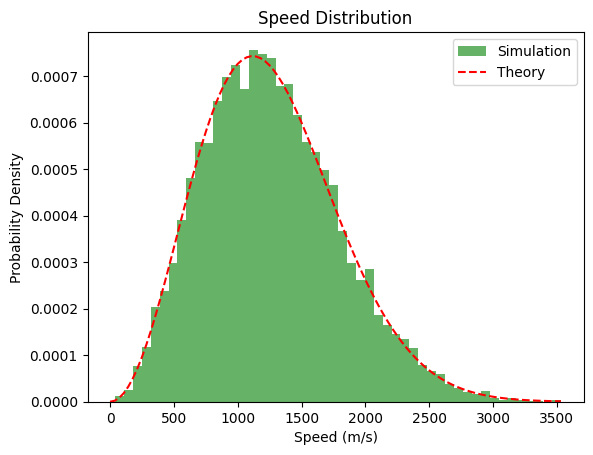

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import gc

def generate_initial_velocities_2d(N, temperature, mass):
    # 使用 maxwell.rvs() 生成速度向量
    speeds = np.zeros((N, 2))
    vel = maxwell.rvs(scale=np.sqrt(k*temperature / mass), size=(N))
    theta = np.random.uniform(0, 2*np.pi, N) #random angle
    speeds[:,0] = vel[:]*np.cos(theta)
    speeds[:,1] = vel[:]*np.sin(theta)
    return speeds
gc.collect()
# 參數設定
k=const.Boltzmann
N_particles = 10000 # 粒子數量
temperature = 300  # 溫度 (K)
mass = 4 * 1.66054e-27  # Alpha粒子的質量 (kg)，假設為4個中子和質子的總質量

# 生成初始速度向量
initial_velocities_2d = generate_initial_velocities_2d(N_particles, temperature, mass)

# 計算速度大小
#speeds_magnitude=np.sqrt(initial_velocities_2d[:,0]**2+initial_velocities_2d[:,1]**2)
speeds_magnitude = np.linalg.norm(initial_velocities_2d, axis=1)

# 繪製速度大小與對應數量的關係圖
plt.hist(speeds_magnitude, bins=50, alpha=0.6, color='g', density=True, label='Simulation')

# 計算理論上的波茲曼速度分布
speeds_range = np.linspace(0, np.max(speeds_magnitude), 100)
theory_distribution = maxwell.pdf(speeds_range, scale=np.sqrt(k*temperature / mass))
plt.plot(speeds_range, theory_distribution, 'r--', label='Theory')

plt.title('Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


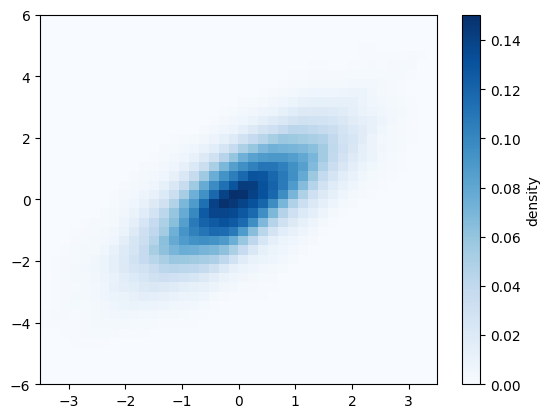

In [5]:
from scipy.stats import gaussian_kde
import numpy as np
# 产生和处理数据，初始化KDE
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的网格中计算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 将图表绘制成一张图像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

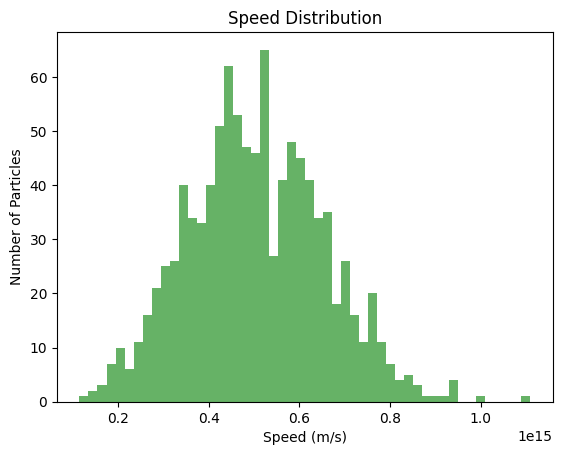

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell

def generate_initial_velocities_2d(N, temperature, mass):
    # 使用 maxwell.rvs() 生成速度向量
    speeds = maxwell.rvs(scale=np.sqrt(temperature / mass), size=(N, 2))
    return speeds

# 參數設定
N_particles = 1000  # 粒子數量
temperature = 300  # 溫度 (K)
mass = 4 * 1.66054e-27  # Alpha粒子的質量 (kg)，假設為4個中子和質子的總質量

# 生成初始速度向量
initial_velocities_2d = generate_initial_velocities_2d(N_particles, temperature, mass)

# 計算速度大小
speeds_magnitude = np.linalg.norm(initial_velocities_2d, axis=1)

# 繪製速度大小與對應數量的關係圖
plt.hist(speeds_magnitude, bins=50, alpha=0.6, color='g')
plt.title('Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Number of Particles')
plt.show()


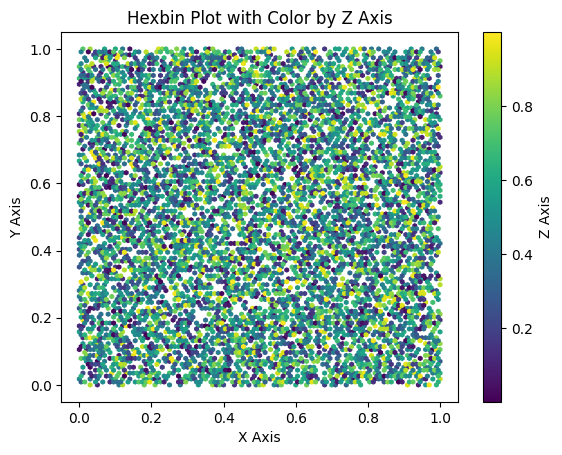

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据作为示例
data = np.random.rand(10000, 3)  # 100个数据点，每个数据点有3个维度的值

# 分别取出 x, y, z 值
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# 绘制 hexbin 图
plt.hexbin(x, y, C=z, gridsize=100, cmap='viridis')  # gridsize 控制网格的大小，cmap 指定色图
plt.colorbar(label='Z Axis')  # 添加颜色条
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Hexbin Plot with Color by Z Axis')
plt.show()

In [8]:
import numpy as np

from functions.Particles import Particles
from functions.DataProcesser import DataProcesser
from functions.Environment import Environment
from functions.Simulators import Simulators


particles_number=1000
particles=Particles(particles_number)
particles.set_particles()
# 生成随机数据作为示例
data = np.random.rand(100, 3)  # 100个数据点，每个数据点有3个维度的值

# 分别取出 x, y, z 值
z=np.linalg.norm(particles.vel, axis=1)**2*particles.mass/(3*const.Boltzmann)
x = particles.pos[:, 0]
y = particles.pos[:, 1]

# 计算 KDE
kde = gaussian_kde([x, y])

# 生成网格点
x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
z_grid = kde(np.vstack([x_grid.ravel(), y_grid.ravel()]))

# 绘制等高线图
plt.contourf(x_grid, y_grid, z_grid.reshape(x_grid.shape), cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Contour Plot with KDE')
plt.show()

ModuleNotFoundError: No module named 'Particles'

In [ ]:
import numba as nb
@nb.njit(parallel=True)
def determine_z_value(xbins,ybins,x,y,z_values):
    # Calculate bin centers
    xcenters = (xbins[:-1] + xbins[1:]) / 2
    ycenters = (ybins[:-1] + ybins[1:]) / 2
    # Initialize an array to store the mean values
    mean_values = np.zeros((len(xcenters), len(ycenters)))

    for i in range(len(xcenters)):
        for j in range(len(ycenters)):
            x_in_bin = (x >= xbins[i]) & (x < xbins[i+1])
            y_in_bin = (y >= ybins[j]) & (y < ybins[j+1])
            points_in_bin = x_in_bin & y_in_bin
            if np.sum(points_in_bin) > 0:
                mean_values[i, j] = np.mean(z_values[points_in_bin])
    return mean_values

T= 299.35565666292143


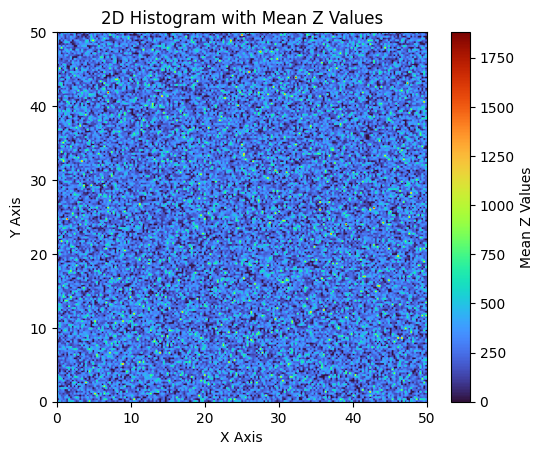

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined 'particles' and 'const' somewhere in your code
particles_number=100000
particles=Particles(particles_number)
particles.set_particles(pos_type='uniform',vel_type='Boltzmann',room_size=[0,50,0,50],T=300,particle_type='air')
# Extract x, y positions from particles
x = particles.pos[:, 0]
y = particles.pos[:, 1]

# Assuming you have a third dimension 'z_values'
z_values = np.linalg.norm(particles.vel, axis=1)**2*particles.mass/(3*const.Boltzmann)

# Define resolution and room size
resolution = 200  # Example resolution
xmin, xmax, ymin, ymax = particles.room_size

# Calculate bin edges
xbins = np.linspace(xmin, xmax, resolution)
ybins = np.linspace(ymin, ymax, resolution)



# Loop through each bin and calculate the mean value of z_values within that bin
mean_values=determine_z_value(xbins,ybins,x,y,z_values)

tt=np.mean(z_values)
print('T=',tt)
# Plot the 2D histogram with mean values
plt.imshow(mean_values.T, extent=(xmin, xmax, ymin, ymax), cmap='turbo', origin='lower')
plt.colorbar(label='Mean Z Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('2D Histogram with Mean Z Values')
plt.show()


T= 299.35565666292143


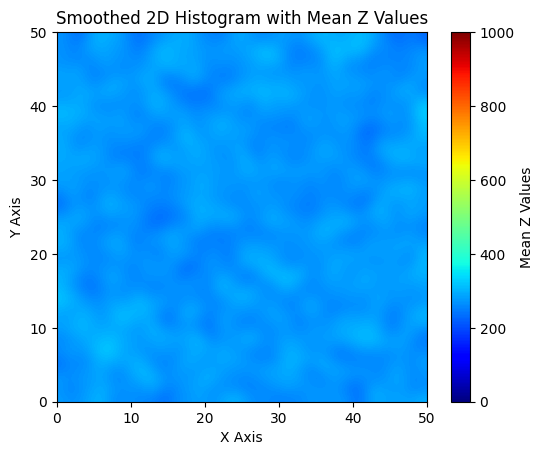

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Smooth the data using a Gaussian filter
smoothed_mean_values = gaussian_filter(mean_values, sigma=5)

tt = np.mean(z_values)
print('T=', tt)

# Plot the 2D histogram with mean values
plt.imshow(smoothed_mean_values.T, extent=(xmin, xmax, ymin, ymax), cmap='jet',vmin=0,vmax=1000, origin='lower')
plt.colorbar(label='Mean Z Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Smoothed 2D Histogram with Mean Z Values')
plt.show()

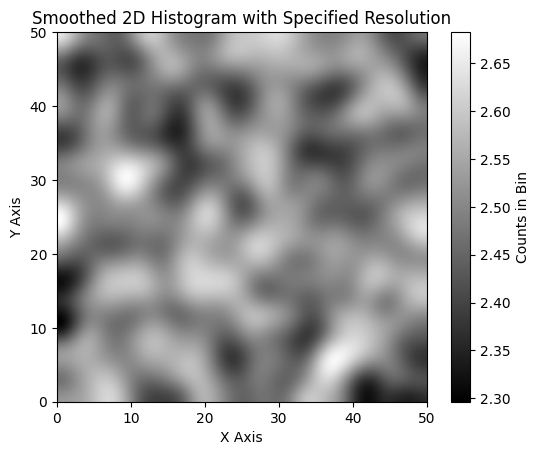

In [ ]:
from scipy.ndimage import gaussian_filter
x = particles.pos[:, 0]
y = particles.pos[:, 1]
H, xedges, yedges = np.histogram2d(x, y, bins=resolution)
smoothed_H = gaussian_filter(H, sigma=8)
plt.imshow(smoothed_H.T, extent=particles.room_size, cmap='gray', origin='lower')
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Smoothed 2D Histogram with Specified Resolution')
plt.show()


In [ ]:
i=range(5)
j=range(5)
ii,jj=np.meshgrid(i,j)

print(ii)
print(jj)
L=list(map(lambda x,y:x*y,ii,jj))
print(*L)
print(L[2][2])


[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[0 0 0 0 0] [0 1 2 3 4] [0 2 4 6 8] [ 0  3  6  9 12] [ 0  4  8 12 16]
4


In [2]:

import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
import imageio
import os
def traverse_imgs(writer, images):
    # 遍历所有图片，并且让writer抓取视频帧
    for img in images:
        plt.imshow(img)
        writer.grab_frame()
        plt.pause(0.01)
        plt.clf()
 
if __name__ == '__main__':
    # 创建video writer, 设置好相应参数，fps
    metadata = dict(title='01', artist='Matplotlib',comment='depth prediiton')
    writer = FFMpegWriter(fps=10, metadata=metadata)
 
    # 读出自己的所有图片
    image_path = os.path.join(image_folder, image_file)
    image = imageio.imread(image_path)
    figure = plt.figure(figsize=(10.8, 7.2))
    plt.ion()                                   # 为了可以动态显示
    plt.tight_layout()                          # 尽量减少窗口的留白
    with writer.saving(figure, 'out.mp4', 100): 
        traverse_imgs(writer, images)


ModuleNotFoundError: No module named 'imageio'

In [3]:
import numpy as np
import matplotlib.animation as animation
import numpy as np
from functions.Particles import Particles
from functions.DataProcesser import DataProcesser
import time
import gc
from numba import set_num_threads
def output_movie(fns, resolution=100, sigma=5, filename='movie.mp4', fps=30, plot_func='plot_gas_temperature'):
    """
    This function will create a movie of the data.
    fns: list, the list of output files
    filename: string, the name of the output movie
    fps: int, the frame per second of the movie
    plot_func: string, the name of the plot function
    """
    fig = plt.figure()
    fig=DataProcesser.plot_gas_number_density([], resolution=resolution,sigma=sigma,fig_save=True)
    def init():
        # Do any necessary setup here
        return []
    def update(frame):
        fn = fns[frame]
        print('filepath=',fn)
        print('frame=',frame)
        particles = DataProcesser.data_input(fn)    
        fig=animation.set_data(particles)
        return fig, 
    ani = animation.FuncAnimation(fig, update, frames=len(fns), init_func=init)
    ani.save(filename, writer='ffmpeg', fps=fps)
    return

gc.collect()
nthreads = 2
set_num_threads(nthreads)
particles_number=10000
particles=Particles(particles_number)
particles.set_particles(pos_type='uniform',vel_type='Boltzmann',room_size=[0,50,0,50],T=300,molecular_weight=28.9)
start_time = time.time()
#DataProcesser.plot_velocity_distribution(particles.T, particles.mass, particles.vel)
#DataProcesser.plot_position_distribution(particles.pos,room_size=particles.room_size, Nsection=1)
#DataProcesser.plot_gas_number_density(particles, resolution=100,sigma=3,fig_save=True)
#DataProcesser.plot_gas_temperature(particles, resolution=100,vmin=280,vmax=320,sigma=7,fig_save=True)
# DataProcesser.data_output(particles,'data','particles')
particles=DataProcesser.data_input('../data/test_rotate_t0000.bin')
#DataProcesser.plot_velocity_distribution(particles.T, particles.mass, particles.vel)
End_time = time.time()
print('Time:',End_time-start_time)

fns=DataProcesser.load_files('test_rotate')
DataProcesser.output_movie(fns, resolution=100, sigma=1, filename="test_rotate.mp4", fps=1, plot_func="plot_gas_number_density")


Time: 0.0
['data\\test_rotate_t0000.bin', 'data\\test_rotate_t0100.bin', 'data\\test_rotate_t0200.bin', 'data\\test_rotate_t0300.bin', 'data\\test_rotate_t0400.bin', 'data\\test_rotate_t0500.bin', 'data\\test_rotate_t0600.bin', 'data\\test_rotate_t0700.bin', 'data\\test_rotate_t0800.bin', 'data\\test_rotate_t0900.bin', 'data\\test_rotate_t1000.bin']
filepath= data\test_rotate_t0000.bin
frame= 0


ModuleNotFoundError: No module named 'Particles'

<Figure size 640x480 with 0 Axes>

In [12]:

import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
import imageio
import os

import cv2
import os

def create_video_from_images(image_folder, output_video, fps=30):
    # Get a list of all the images in the directory
    images = [img for img in os.listdir(image_folder) if img.endswith((".png", ".jpg", ".jpeg"))]
    #images.sort()  # Sort images to maintain order
    print(images)
    if not images:
        raise ValueError("No images found in the specified folder")

    # Read the first image to get the dimensions
    first_image_path = os.path.join(image_folder, images[0])
    print(first_image_path)
    frame = cv2.imread(first_image_path)
    height, width, layers = frame.shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # For .mp4 files
    video = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    for image in images:
        image_path = os.path.join(image_folder, image)
        print(image_path)
        frame = cv2.imread(image_path)
        video.write(frame)

    video.release()

# Usage
image_folder = 'Gas_number_density_Distribution'
output_video = 'output_video.mp4'
create_video_from_images(image_folder, output_video)

['gas_number_density_resolution100_t0.png', 'gas_number_density_resolution100_t100.png', 'gas_number_density_resolution100_t1000.png', 'gas_number_density_resolution100_t200.png', 'gas_number_density_resolution100_t300.png', 'gas_number_density_resolution100_t400.png', 'gas_number_density_resolution100_t500.png', 'gas_number_density_resolution100_t600.png', 'gas_number_density_resolution100_t700.png', 'gas_number_density_resolution100_t800.png', 'gas_number_density_resolution100_t900.png']
Gas_number_density_Distribution\gas_number_density_resolution100_t0.png
Gas_number_density_Distribution\gas_number_density_resolution100_t0.png
Gas_number_density_Distribution\gas_number_density_resolution100_t100.png
Gas_number_density_Distribution\gas_number_density_resolution100_t1000.png
Gas_number_density_Distribution\gas_number_density_resolution100_t200.png
Gas_number_density_Distribution\gas_number_density_resolution100_t300.png
Gas_number_density_Distribution\gas_number_density_resolution100